In [1]:
%pip install openpyxl --quiet
%pip install plotly --quiet
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [143]:
file_path = "Dataset A_BNE - Road Accident Data (1).xlsx"
df = pd.read_excel(file_path, sheet_name=1)

In [4]:
df.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_DESCRIPTION,DCA_CODE_DESCRIPTION,DCA_CODE_TYPE,LIGHT_CONDITION_DESCRIPTION,NO_PERSONS_INVOLVED,NO_PERSONS_KILLED,NO_PERSONS_INJ_SERIOUS,...,ROAD_NAME_2,ROAD_TYPE_2,DIRECTION_LOCATION,DIRECTORY,EDITION,PAGE,GRID_REFERENCE_X,GRID_REFERENCE_Y,LGA_NAME,REGION_NAME
0,T20110000012,2011-01-01,01:06:00,Struck pedestrian,Near side,Pedestrian on foot/toy/pram,Dark street lights on,2,0,0,...,THE ESPLANADE,NaN,NaN,MEL,ED35,92,K,9,KINGSTON,METROPOLITAN SOUTH EAST REGION
1,T20110000014,2011-01-01,00:15:00,Collision with a fixed object,Left off carriageway into object/parked vehicle,Off path on straight,Dark street lights on,1,0,1,...,LORIMER,STREET,NaN,MEL,ED35,20,H,2,BANYULE,METROPOLITAN NORTH WEST REGION
2,T20110000023,2011-01-01,04:28:00,Struck pedestrian,Other pedestrian,Pedestrian on foot/toy/pram,Dark street lights on,3,0,2,...,POUND,ROAD,N,MEL,ED35,96,F,6,CASEY,METROPOLITAN SOUTH EAST REGION
3,T20110000025,2011-01-01,01:07:00,Struck pedestrian,"Playing, working, lying, standing on carriageway",Pedestrian on foot/toy/pram,Dark no street lights,2,1,1,...,CALDER,HIGHWAY,SW,VCD,ED7,626,B,10,BENDIGO,NORTHERN REGION
4,T20110000035,2011-01-01,11:54:00,Collision with a fixed object,Right off carriageway into object/parked vehicle,Off path on straight,Day,1,0,1,...,UNNAMED,NaN,SE,MEL,ED35,72,H,2,KNOX,METROPOLITAN SOUTH EAST REGION


In [5]:
df['ACCIDENT_TIME'] = pd.to_datetime(df['ACCIDENT_TIME'], format="%H:%M:%S")
df['ACCIDENT_TIME'] = df['ACCIDENT_TIME'].dt.time

In [6]:
df['Day_Name'] = df['ACCIDENT_DATE'].dt.day_name()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25484 entries, 0 to 25483
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   ACCIDENT_NO                       25484 non-null  object        
 1   ACCIDENT_DATE                     25484 non-null  datetime64[ns]
 2   ACCIDENT_TIME                     25484 non-null  object        
 3   ACCIDENT_DESCRIPTION              25484 non-null  object        
 4   DCA_CODE_DESCRIPTION              25484 non-null  object        
 5   DCA_CODE_TYPE                     25484 non-null  object        
 6   LIGHT_CONDITION_DESCRIPTION       25484 non-null  object        
 7   NO_PERSONS_INVOLVED               25484 non-null  int64         
 8   NO_PERSONS_KILLED                 25484 non-null  int64         
 9   NO_PERSONS_INJ_SERIOUS            25484 non-null  int64         
 10  NO_PERSONS_INJ_MEDICAL_ATTENTION  25484 non-nu

In [7]:
#Checking for total null values in each column
df.isnull().sum().tail(20)

SEVERITY                    0
SEVERITY_DESCRIPTION        0
SPEED_ZONE                  0
LOCATION_TYPE               0
LOCALS_INVOLVED             0
LON                         0
LAT                         0
ROAD_NAME_1                 1
ROAD_TYPE_1               441
ROAD_NAME_2                33
ROAD_TYPE_2              1416
DIRECTION_LOCATION      13478
DIRECTORY                   0
EDITION                     0
PAGE                        0
GRID_REFERENCE_X            0
GRID_REFERENCE_Y            0
LGA_NAME                    0
REGION_NAME                 0
Day_Name                    0
dtype: int64

In [8]:
#Dropping "DIRECTION_LOCATION" because of having about 50% NULL values and also unwanted column for analysis
df.drop('DIRECTION_LOCATION', axis=1,inplace=True)

In [9]:
# dt = datetime.now()
# time = dt.time()
# print(time)
# sixam = time.replace(hour=6,minute=00,second=00,microsecond=00)
# sixpm = time.replace(hour=18,minute=00,second=00,microsecond=00)

# for df['ACCIDENT_TIME'], row in df.iterrows():
#     if df.ACCIDENT_TIME > sixpm:
#         df["DayNight"] = "Night"
#     elif df.ACCIDENT_TIME < sixam:
#         df["DayNight"] = "Night"
#     else:
#        df["DayNight"] = "Day"

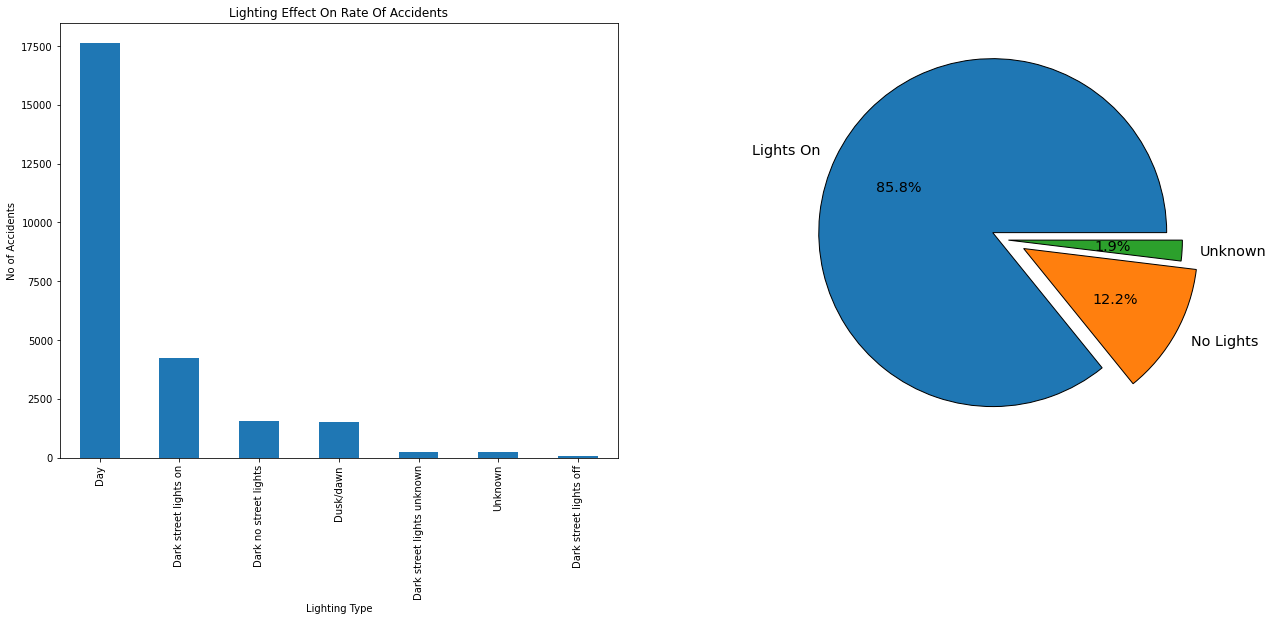

In [10]:
plt.subplot(121)
ax = df['LIGHT_CONDITION_DESCRIPTION'].value_counts().plot(kind='bar',figsize=(25,8),title="Lighting Effect On Rate Of Accidents")
ax.set_xlabel("Lighting Type")
ax.set_ylabel("No of Accidents")



#Dividing Lighting condition in 3 categories
light_on = df[df['LIGHT_CONDITION_DESCRIPTION'].str.contains('Day') | df['LIGHT_CONDITION_DESCRIPTION'].str.contains('Dark street lights on')]
dark = df[df['LIGHT_CONDITION_DESCRIPTION'].str.contains('Dusk/dawn') | df['LIGHT_CONDITION_DESCRIPTION'].str.contains('Dark street lights off') | df['LIGHT_CONDITION_DESCRIPTION'].str.contains('Dark no street lights')]
unknown = df[df['LIGHT_CONDITION_DESCRIPTION'].str.contains('unknown') | df['LIGHT_CONDITION_DESCRIPTION'].str.contains('Unknown')]


plt.subplot(122)
z = np.array([len(light_on), len(dark), len(unknown)])
label = ["Lights On", "No Lights", "Unknown"]
#fig = plt.figure(figsize = (10,7))
explode = (0.1, 0.1, 0.0)
pie = plt.pie(z, labels=label, explode=explode, autopct='%.1f%%', wedgeprops={'linewidth' : 1, 'edgecolor': 'black'}, textprops={'color' : 'black', 'size':'x-large'})


plt.show()

### Speed Effects

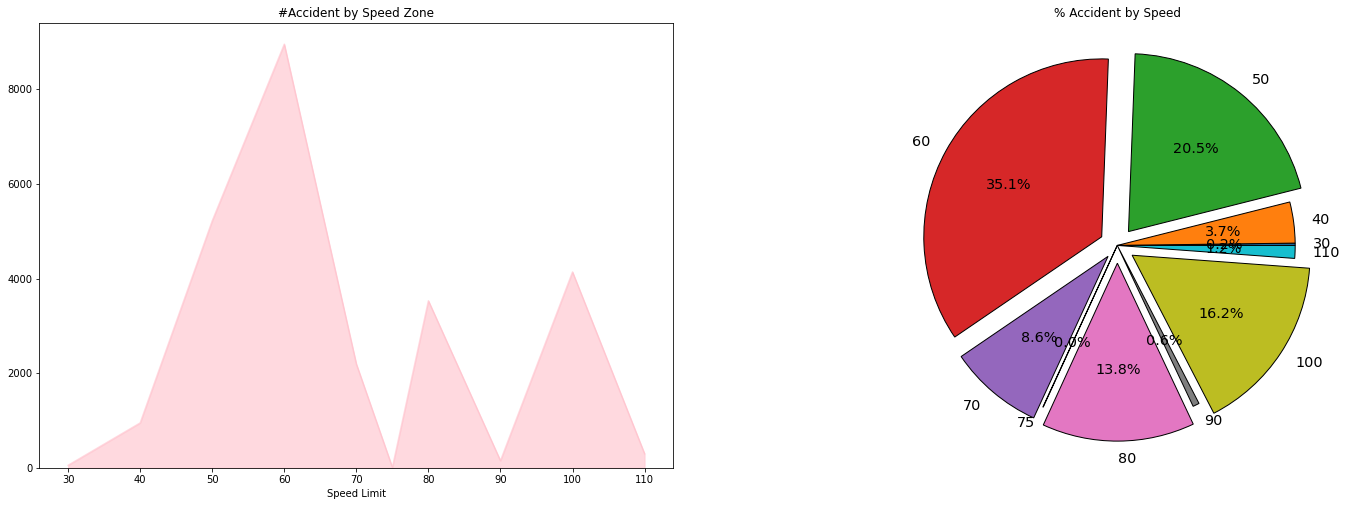

In [11]:
fig1 = plt.subplot2grid((2,2),(0,0))
df2 = df.groupby('SPEED_ZONE')['SPEED_ZONE'].count()
ax = df2.plot.area(title = '#Accident by Speed Zone', xlabel='Speed', color="pink", alpha=0.6)
ax.set_xlabel('Speed Limit')
ax.plot(color = "red", alpha=0.8)



fig1 = plt.subplot2grid((2,2),(0,1))
explode = (0,0,0.1,0.1,0.08,0,0.1,0,0.1,0)
df.groupby('SPEED_ZONE')['SPEED_ZONE'].count().plot(kind='pie', title='% Accident by Speed Limit',figsize=(25,18), label='', autopct='%.1f%%', explode=explode,wedgeprops={'linewidth' : 1, 'edgecolor': 'black'}, textprops={'color' : 'black', 'size':'x-large'})



#fig1 = plt.subplot2grid((2,2),(1,0))



#fig1 = plt.subplot2grid((2,2),(1,0))
#explode = (0,0,0.1,0.1,0.08,0,0.1,0,0.1,0)
#df.groupby('SEVERITY')['SPEED_ZONE'].count().plot(kind='pie', title='% Accident by Speed', label='',figsize=(25,17), autopct='%.1f%%', wedgeprops={'linewidth' : 1, 'edgecolor': 'black'}, textprops={'color' : 'black', 'size':'x-large'})


plt.show()

In [136]:
# ax = df.SPEED_ZONE.unique().tolist()
# ay = df.loc[df['SEVERITY'] == 1]
# ay2 = ay.groupby(['SPEED_ZONE'])['SEVERITY'].count().sort_index()
# s1 = ay2.tolist()
# ay = df.loc[df['SEVERITY'] == 2]
# ay2 = ay.groupby(['SPEED_ZONE'])['SEVERITY'].count()
# s2 = ay2.tolist()
# ay = df.loc[df['SEVERITY'] == 3]
# ay2 = ay.groupby(['SPEED_ZONE'])['SEVERITY'].count()
# s3 = ay2.tolist()
# df4 = pd.DataFrame({'SPEED_ZONE': pd.Series(ax), 'SEVERITY_1': pd.Series(s1), 'SEVERITY_2': pd.Series(s2), 'SEVERITY_3': pd.Series(s3)}).fillna(0)
# #df4.sort_values('SPEED_ZONE').plot.bar(x='SPEED_ZONE', stacked=True,figsize=(25,12))
# df4.plot.bar(x='SPEED_ZONE', stacked=True,figsize=(25,12))

<AxesSubplot:title={'center':'Severity by Speed Zone'}, xlabel='SPEED_ZONE'>

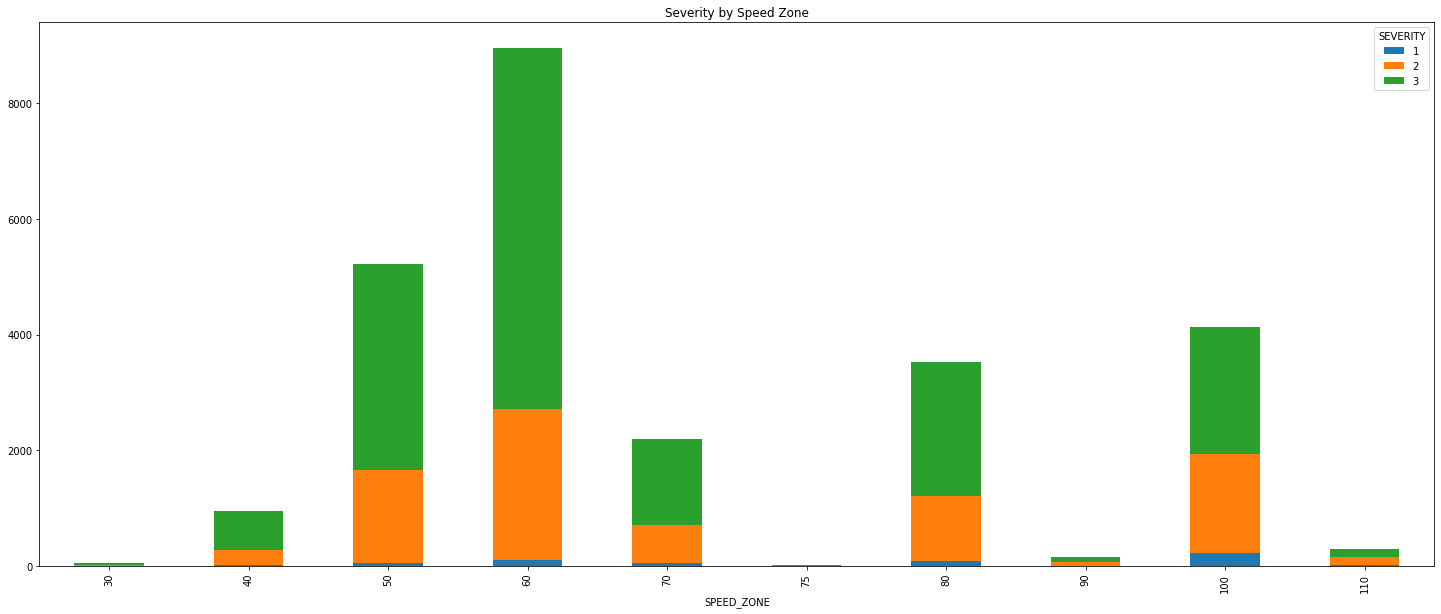

In [154]:
df_new = df.groupby(['SPEED_ZONE','SEVERITY'])['ACCIDENT_NO'].count().reset_index(name="Total")
stacked_plot = pd.pivot_table(df_new, index=['SPEED_ZONE'], columns='SEVERITY',values='Total')
stacked_plot.plot.bar(title='Severity by Speed Zone',stacked=True,figsize=(25,10))

C:\Users\prthp\AppData\Local\Temp\ipykernel_20504\364692155.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new2 = df.groupby(['SPEED_ZONE'])['NO_PERSONS_KILLED','NO_PERSONS_INJ_SERIOUS','NO_PERSONS_INJ_MEDICAL_ATTENTION'].sum()


<AxesSubplot:title={'center':'Casualties by Speed Zone'}, xlabel='SPEED_ZONE'>

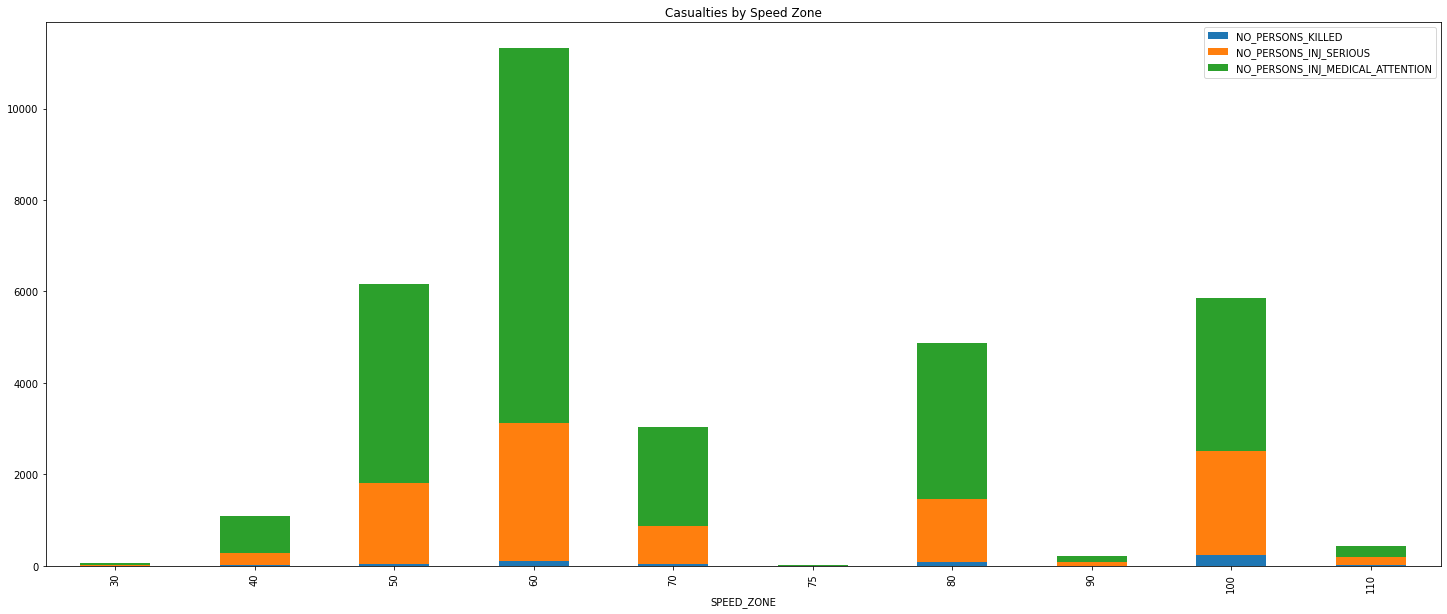

In [170]:
df_new2 = df.groupby(['SPEED_ZONE'])['NO_PERSONS_KILLED','NO_PERSONS_INJ_SERIOUS','NO_PERSONS_INJ_MEDICAL_ATTENTION'].sum()
#stacked_plot = pd.pivot_table(df_new2, index=['SPEED_ZONE'], columns='NO_PERSONS_KILLED',values='NO_PERSONS_KILLED')
df_new2.plot.bar(title='Casualties by Speed Zone',stacked=True,figsize=(25,10))